**NAME: JUBILEE AMECHI**  
**TASK: WEB SCRAPING TO GAIN COMPANY INSIGHTS**

**STEP 1: Install & import the needed libraries**

In [19]:
# Install necessary libraries 
!pip install requests beautifulsoup4 wordcloud nltk matplotlib pandas seaborn textblob
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**STEP 2:  Web Scraping /Extracting Reviews**

In [55]:
# Defining the URL for British Airways reviews 
url = "https://www.airlinequality.com/airline-reviews/british-airways/"

# Function to scrape reviews
def scrape_reviews(url, num_pages=5):
    reviews = []
    headers = {"User-Agent": "Mozilla/5.0"}
    
    for page in range(1, num_pages + 1):
        response = requests.get(f"{url}page/{page}/", headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        review_texts = soup.find_all("div", class_="text_content")
        
        for review in review_texts:
            reviews.append(review.get_text(strip=True))
    
    return reviews

# Scraping the reviews
reviews = scrape_reviews(url)


print("Done")


Done


**STEP 3: Text Cleaning**

In [57]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words("english")]
    return words

# Processing all reviews
all_words = []
for review in reviews:
    all_words.extend(clean_text(review))

# Counting word frequencies
word_counts = Counter(all_words)
common_words = word_counts.most_common(15)  # Getting top 15 words

print("Done")


Done


**STEP 4: Visualization**

C:\Users\Hp\AppData\Local\Temp\ipykernel_14132\1501831444.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=df_words, palette="grey")


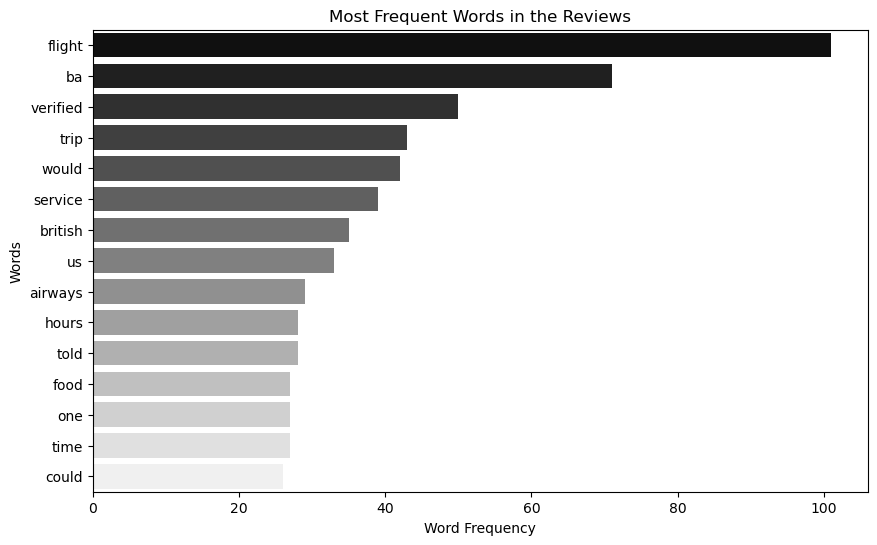

In [45]:
# Converting word frequency data into DataFrame
df_words = pd.DataFrame(common_words, columns=["Word", "Count"])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Word", data=df_words, palette="grey")
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.title("Most Frequent Words in the Reviews")
plt.savefig("Word_Frequency_Chart.png", dpi=300, bbox_inches="tight")
plt.show() # To show chart


**STEP 5: Sentiment Analysis**

In [30]:
# Function to get sentiment polarity
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Analyzing sentiment for all reviews
sentiments = [get_sentiment(review) for review in reviews]

# Counting sentiment occurrences
sentiment_counts = Counter(sentiments)

print("Done")

Done


**STEP 6: Visualization**

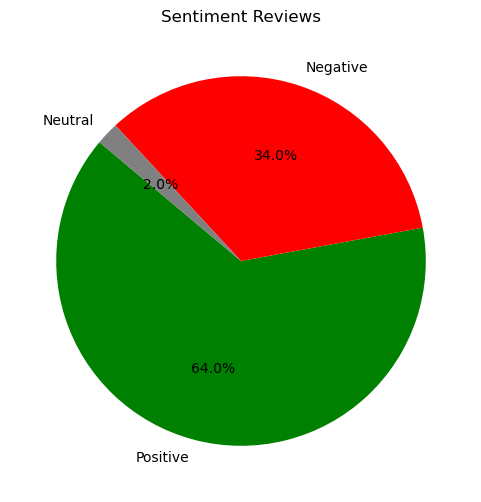

In [43]:
# Preparing sentiment data for visualization
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ["green", "red", "gray"]

# Plotting the pie chart and saving it as an image
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Reviews")
plt.savefig("Sentiment_Analysis.png", dpi=300, bbox_inches="tight")
plt.show() #To show chart


In [59]:
total_reviews = len(reviews)  # Count the total number of reviews
print(f"Total number of reviews: {total_reviews}")

Total number of reviews: 50
